In [1]:
import numpy as np
from cmaes import CMA
# import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColorBar, LinearColorMapper
from bokeh.io import push_notebook
import itertools
import matplotlib.pyplot as plt

from quantify_core.data.handling import (
    default_datadir,
    get_latest_tuid,
    load_dataset,
    locate_experiment_container,
    set_datadir,
)

In [2]:
set_datadir(default_datadir())

Data will be saved in:
/home/pschaefers/quantify-data


In [3]:
tuid = get_latest_tuid(contains="Single-shot")
dataset = load_dataset(tuid)
dataset

<xarray.Dataset> Size: 198kB
Dimensions:  (dim_0: 2744)
Coordinates:
    x0       (dim_0) float64 22kB 4.8e-08 8.4e-08 1.16e-07 ... 4.64e-07 4.96e-07
    x1       (dim_0) float64 22kB 7.37e+09 7.37e+09 ... 7.42e+09 7.42e+09
    x2       (dim_0) float64 22kB 0.005 0.005 0.005 0.005 ... 0.07 0.07 0.07
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 22kB 0.5121 0.5113 0.5073 ... 0.6654 0.6754 0.6877
    y1       (dim_0) float64 22kB 0.5138 0.5134 0.5043 ... 0.691 0.7051 0.7134
    y2       (dim_0) float64 22kB 0.5136 0.5111 0.5088 ... 0.742 0.7585 0.7749
    y3       (dim_0) float64 22kB 0.509 0.5095 0.5088 ... 0.5631 0.5624 0.5748
    y4       (dim_0) float64 22kB 0.5 0.5044 0.5 0.5 ... 0.5884 0.6033 0.6135
    y5       (dim_0) float64 22kB 0.5 0.5001 0.5 0.5 ... 0.5572 0.5739 0.5796
Attributes:
    tuid:                             20241127-010313-461-3332cc
    name:                             Single-shot readout vs. pulse duration,...
    grid_2d:                          False
    grid_2d_uniformly_spaced:         False
    1d_2_settables_uniformly_spaced:  False

In [4]:
duration = dataset.x0.data
frequency = dataset.x1.data
amplitude = dataset.x2.data
average_fidelity = dataset.y0.data
QND_pi_fidelity = dataset.y5.data

unique_durations = np.unique(duration)
# print(len(unique_durations))
# print(unique_durations)
# print(np.diff(unique_durations))

indices = np.where(duration == unique_durations[-1])
frequency = frequency[indices]
amplitude = amplitude[indices]
fidelity = average_fidelity[indices]

In [5]:
#Import the data from measurements
duration = dataset.x0.data
frequency = dataset.x1.data
amplitude = dataset.x2.data
average_fidelity = dataset.y0.data
QND_pi_fidelity = dataset.y5.data

#Extract data for a single unique duration
unique_durations = np.unique(duration)
indices = np.where(duration == unique_durations[-1])
frequency = frequency[indices]
amplitude = amplitude[indices]
fidelity = average_fidelity[indices]

#Plot data with Bokeh:

# Ensure Bokeh outputs to the notebook
# This allows the Bokeh plot to be rendered directly in the Jupyter Notebook.
output_notebook()

# Reshape fidelity to 2D (if not already a grid)
# Assume 'fidelity' is a 1D array and needs to be reshaped into a 2D grid for plotting.
# Use the square root of the array's length to determine the grid dimensions.
Z = fidelity.reshape(int(np.sqrt(len(amplitude))), int(np.sqrt(len(frequency))))

# Calculate the extent of the axes for imshow-like behavior
# This determines the range of the x and y axes based on frequency and amplitude values.
dx = (frequency.max() - frequency.min()) / (Z.shape[1] - 1)  # Step size along the x-axis
dy = (amplitude.max() - amplitude.min()) / (Z.shape[0] - 1)  # Step size along the y-axis

# Define the extent, which specifies the range of the axes
extent = [
    frequency.min() - 0.5 * dx, frequency.max() + 0.5 * dx,  # x-axis range
    amplitude.min() - 0.5 * dy, amplitude.max() + 0.5 * dy   # y-axis range
]

# Set up a color mapper to map fidelity values to colors
# 'Viridis256' is a built-in colormap with 256 shades.
cmap = 'Viridis256'  # Colormap for the plot
vmin, vmax = 0.5, 1  # Set the range of fidelity values for color mapping
color_mapper = LinearColorMapper(palette=cmap, low=vmin, high=vmax)

# Create the figure for the plot
# Customize the title, axis labels, range, and size of the figure.
p = figure(
    title="test",  # Title of the plot
    x_range=(extent[0], extent[1]),  # Range for the x-axis (frequency)
    y_range=(extent[2], extent[3]),  # Range for the y-axis (amplitude)
    x_axis_label="Frequency [Hz]",  # Label for the x-axis
    y_axis_label="Amplitude [V]",   # Label for the y-axis
    tooltips=[("Fidelity", "@image")],  # Tooltip to display fidelity values on hover
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Add the 2D image (heatmap) to the figure
# The 'image' glyph plots the 2D array 'Z' as a heatmap on the specified range.
p.image(
    image=[Z],              # The 2D array to plot (fidelity values)
    x=extent[0],            # Start position of the image along the x-axis
    y=extent[2],            # Start position of the image along the y-axis
    dw=extent[1] - extent[0],  # Width of the image (frequency range)
    dh=extent[3] - extent[2],  # Height of the image (amplitude range)
    color_mapper=color_mapper  # Use the color mapper for fidelity values
)

# Add a color bar to the figure
# The color bar provides a visual representation of the fidelity value range.
color_bar = ColorBar(
    color_mapper=color_mapper,  # The color mapper used for the image
    label_standoff=12,          # Distance between the color bar and its label
    title="Fidelity",           # Title of the color bar
    border_line_color=None,     # Remove border around the color bar
    location=(0, 0)             # Position of the color bar
)
p.add_layout(color_bar, 'right')  # Add the color bar to the right of the plot

# Render the plot in the notebook
# The 'notebook_handle=True' allows for interactive updates if needed.
show(p, notebook_handle=True)


Loading BokehJS ...

In [6]:
def fidelityEstimate3D(point, frequency, amplitude, duration, fidelity):
    # Get unique values of frequency, amplitude, and duration
    unique_freq = np.unique(frequency)
    unique_ampl = np.unique(amplitude)
    unique_dur = np.unique(duration)
    
    # Get the closest 3 unique frequencies, amplitudes, and durations
    dFreq = np.abs(unique_freq - point[0])
    dAmpl = np.abs(unique_ampl - point[1])
    dDur = np.abs(unique_dur - point[2])
    
    freqArgs = np.argsort(dFreq)[:2]
    amplArgs = np.argsort(dAmpl)[:2]
    durArgs = np.argsort(dDur)[:2]
    
    x_coor = unique_freq[freqArgs]
    y_coor = unique_ampl[amplArgs]
    z_coor = unique_dur[durArgs]
    
    # Sort the coordinates
    sortedX = np.sort(x_coor)
    sortedY = np.sort(y_coor)
    sortedZ = np.sort(z_coor)
    
    # Calculate differences
    dx = np.diff(sortedX)
    dy = np.diff(sortedY)
    dz = np.diff(sortedZ)
    
    fidelities = []
    
    # Iterate through all combinations of (frequency, amplitude, duration)
    for i in itertools.product(sortedX, sortedY, sortedZ):
        temp1 = np.where(i[0] == frequency)
        temp2 = np.where(i[1] == amplitude)
        temp3 = np.where(i[2] == duration)
        arg = np.intersect1d(np.intersect1d(temp1, temp2), temp3)
        fidelities.append(fidelity[arg])
    
    fidelities = np.array(fidelities)
    
    # Reshape fidelities into a 2x2x2 grid for interpolation
    fidelity_matrix = fidelities.reshape((2, 2, 2))
    
    # 3D Bilinear interpolation formula
    result = (fidelity_matrix[0, 0, 0] * (sortedX[1] - point[0]) * (sortedY[1] - point[1]) * (sortedZ[1] - point[2]) +
              fidelity_matrix[1, 0, 0] * (point[0] - sortedX[0]) * (sortedY[1] - point[1]) * (sortedZ[1] - point[2]) +
              fidelity_matrix[0, 1, 0] * (sortedX[1] - point[0]) * (point[1] - sortedY[0]) * (sortedZ[1] - point[2]) +
              fidelity_matrix[1, 1, 0] * (point[0] - sortedX[0]) * (point[1] - sortedY[0]) * (sortedZ[1] - point[2]) +
              fidelity_matrix[0, 0, 1] * (sortedX[1] - point[0]) * (sortedY[1] - point[1]) * (point[2] - sortedZ[0]) +
              fidelity_matrix[1, 0, 1] * (point[0] - sortedX[0]) * (sortedY[1] - point[1]) * (point[2] - sortedZ[0]) +
              fidelity_matrix[0, 1, 1] * (sortedX[1] - point[0]) * (point[1] - sortedY[0]) * (point[2] - sortedZ[0]) +
              fidelity_matrix[1, 1, 1] * (point[0] - sortedX[0]) * (point[1] - sortedY[0]) * (point[2] - sortedZ[0])) / (dx * dy * dz)
    
    return result

In [22]:
def objective(points, frequency, amplitude, duration, fidelity):
    objective = np.zeros(len(points))
    for i in range(len(points)):
        F = fidelityEstimate3D(points[i], frequency, amplitude, duration, fidelity)
        objective[i] = np.log(1-F)[0]
    return objective
    
def cmaes_frequency_amplitude_and_duration(mean, sigma, popsize, Ngen, meas_freq, meas_ampl, meas_dur, meas_fid):
    boundX = [0, 1]
    boundY = [0, 1]
    boundZ = [0, 1]

    minFreq = np.min(meas_freq)
    maxFreq = np.max(meas_freq)

    minAmpl = np.min(meas_ampl)
    maxAmpl = np.max(meas_ampl)

    minDur = np.min(meas_dur)
    maxDur = np.max(meas_dur)
    
    bounds = np.array([boundX, boundY, boundZ])
    
    optimizer = CMA(mean=mean, sigma=sigma, population_size=popsize, bounds=bounds)

    deltaFreq = maxFreq - minFreq
    deltaAmpl = maxAmpl - minAmpl
    deltaDur = maxDur- minDur

    maxFidelity = np.zeros(Ngen)
    coordinate = np.zeros((Ngen, 3))
    meanFidelity = np.zeros(Ngen)

    for generation in range(Ngen):       
        normalized_freq = np.zeros(popsize)
        normalized_ampl = np.zeros(popsize)
        normalized_dur = np.zeros(popsize)
        
        frequencies = np.zeros(popsize)
        amplitudes = np.zeros(popsize)
        durations = np.zeros(popsize)
        
        for i in range(popsize):
            x = optimizer.ask()
            
            normalized_freq[i] = x[0]
            normalized_ampl[i] = x[1]
            normalized_dur[i] = x[2]

            frequencies[i] = x[0]*deltaFreq + minFreq
            amplitudes[i] = x[1]*deltaAmpl + minAmpl
            durations[i] = x[2]*deltaDur + minDur
                    
        normalized_freq_ampl_and_dur = [(float(xi), float(yi), float(zi)) for xi, yi, zi in zip(normalized_freq, normalized_ampl, normalized_dur)]
        freq_ampl_and_dur = np.array([np.array([xi, yi, zi]) for xi, yi, zi in zip(frequencies, amplitudes, durations)])
        objective_value = objective(freq_ampl_and_dur, meas_freq, meas_ampl, meas_dur, meas_fid)

        solutions = [(wi, float(vi)) for wi, vi in zip(normalized_freq_ampl_and_dur, objective_value)]
        optimizer.tell(solutions)

    normalized_mean = optimizer.mean
    
    mean = np.copy(normalized_mean)
    mean[0] = mean[0] * deltaFreq + minFreq
    mean[1] = mean[1] * deltaAmpl + minAmpl
    mean[2] = mean[2] * deltaDur + minDur
    
    fidelity = fidelityEstimate3D(mean, meas_freq, meas_ampl, meas_dur, meas_fid)[0]
    return mean, fidelity

#Import the data from measurements
duration = dataset.x0.data
frequency = dataset.x1.data
amplitude = dataset.x2.data
average_fidelity = dataset.y0.data
QND_pi_fidelity = dataset.y5.data

popsize = 10
sigma = 0.25 #1/4 of the domain 
mean = np.array([0.0,0.0,0.0])
Ngen_array = np.arange(1,50)
mean_evolution = np.zeros((len(Ngen_array),3))
fidelity_evolution = np.zeros(len(Ngen_array))

for i in range(len(Ngen_array)):
    mean_evolution[i,:], fidelity_evolution[i] = cmaes_frequency_amplitude_and_duration(mean, sigma, popsize, Ngen_array[i], frequency, amplitude, duration, average_fidelity)

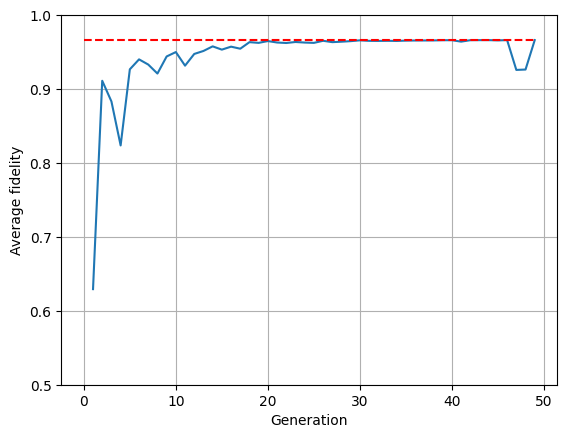

In [23]:
plt.plot(Ngen_array,fidelity_evolution)
plt.xlabel("Generation")
plt.ylabel("Average fidelity")
plt.hlines(max(average_fidelity),0,Ngen_array[-1], color = 'red', ls = "--")
plt.grid()
plt.ylim(0.5,1)
plt.show()

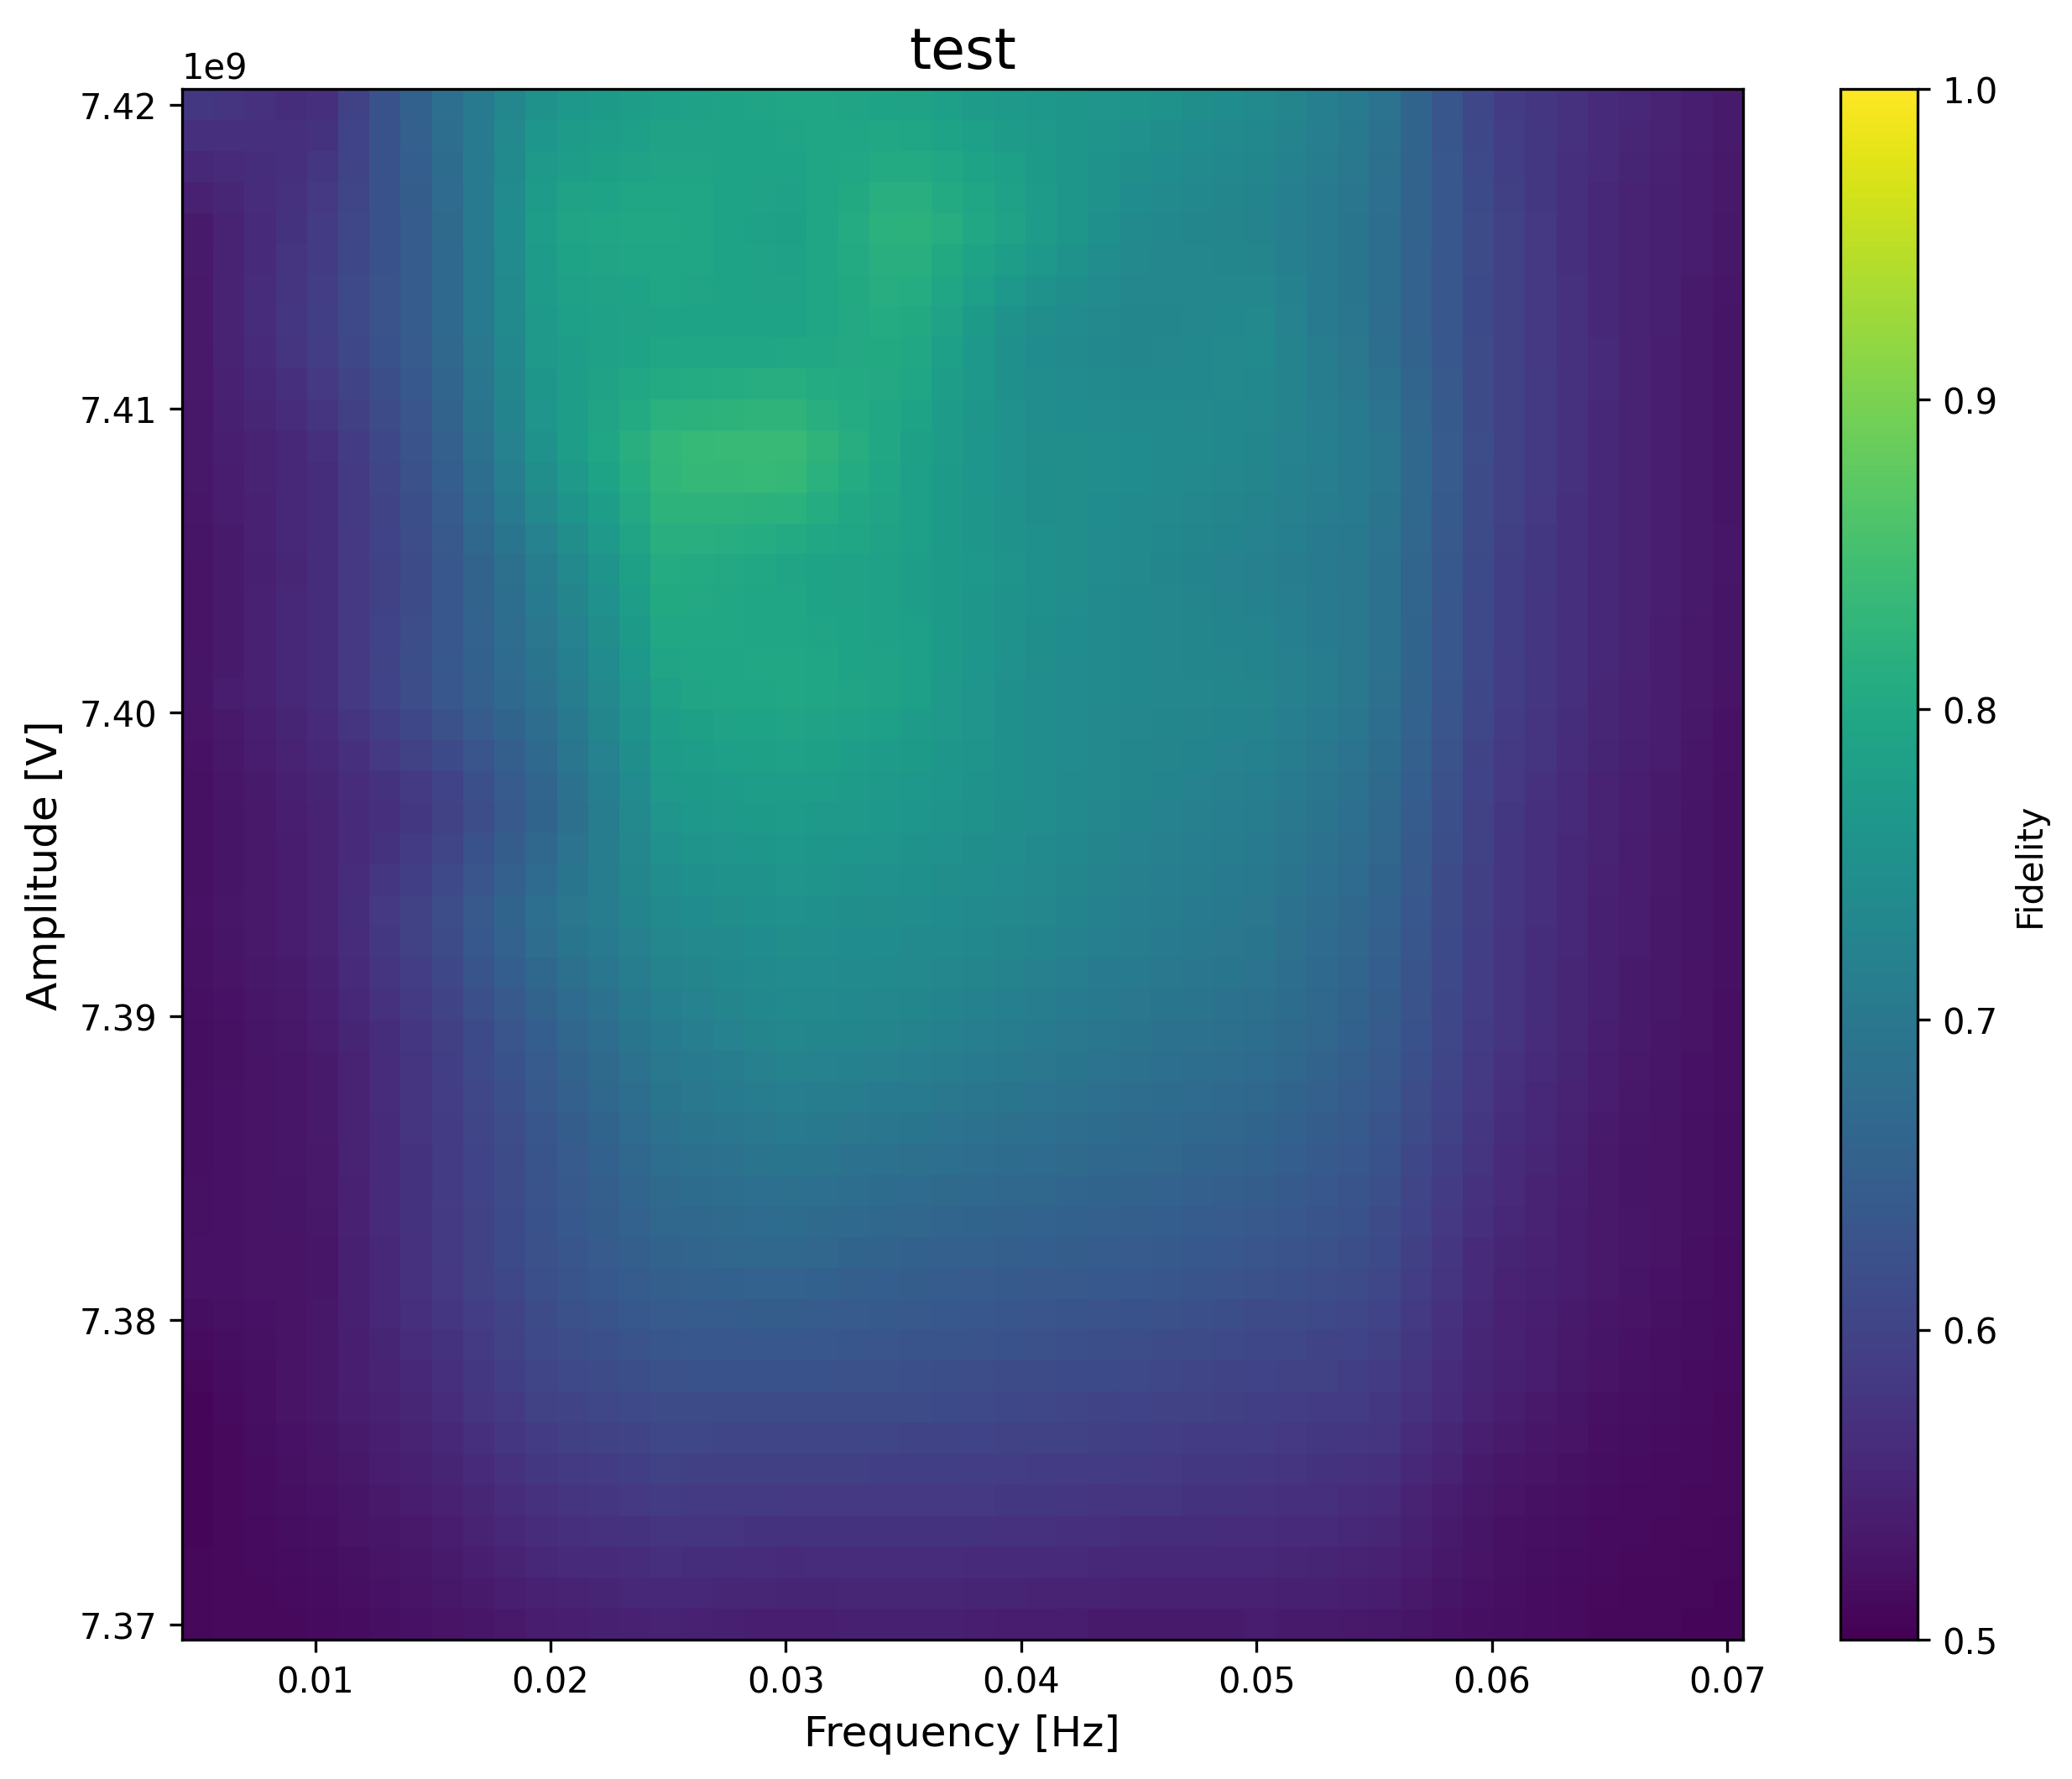

In [19]:
# duration_test = dataset.x0.data
# frequency_test = dataset.x1.data
# amplitude_test = dataset.x2.data
# average_fidelity_test = dataset.y0.data
# # QND_pi_fidelity = dataset.y5.data

# # 3D grid creation (for frequency, amplitude, duration)
# x_array = np.linspace(min(frequency_test), max(frequency_test), 50)  # Frequency axis
# y_array = np.linspace(min(amplitude_test), max(amplitude_test), 50)  # Amplitude axis
# z_array = np.linspace(min(duration_test), max(duration_test), 50)  # Duration axis

# # Generate the 3D grid points (product of all combinations)
# X0 = np.array(list(itertools.product(y_array, x_array, z_array)))
# x = X0[:, 1]
# y = X0[:, 0]
# z = X0[:, 2]

# # Stack the points as (x, y, z)
# points = np.column_stack((x, y, z))

# # List to hold the fidelity estimates
# fidelity_estimates = []

# # Calculate fidelity for each point in the 3D grid
# for point in points:
#     estimate = fidelityEstimate3D(point, frequency_test, amplitude_test, duration_test, average_fidelity_test)
#     fidelity_estimates.append(estimate)

# # Convert to a numpy array for further processing
# fidelity_estimates = np.array(fidelity_estimates)

# # Reshape the fidelity estimates into a 3D grid (matching the shape of x, y, z)
# fidelity_matrix = fidelity_estimates.reshape((len(np.unique(y)), len(np.unique(x)), len(np.unique(z))))

# # Select a fixed duration for the plot (e.g., the first duration value)
# duration_index = 4  # You can change this index to visualize different durations
# fidelity_slice = fidelity_matrix[:, :, duration_index]

# Z = fidelity_slice.reshape(len(y_array),len(x_array))

# # Calculate the extent of the axes for imshow
# dx = (y.max() - y.min()) / (Z.shape[1] - 1)  # Step size along x-axis
# dy = (x.max() - x.min()) / (Z.shape[0] - 1)  # Step size along y-axis

# extent = [
#     y.min() - 0.5 * dx, y.max() + 0.5 * dx,  # x-axis range
#     x.min() - 0.5 * dy, x.max() + 0.5 * dy   # y-axis range
# ]

# # Plot with imshow
# plt.figure(figsize=(10, 8), dpi=300)
# cmap = 'viridis'
# vmin, vmax = 0.5, 1  # Set fidelity range for consistent scaling

# im = plt.imshow(Z, extent=extent, origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax)
# plt.colorbar(im, label="Fidelity")
# plt.title("test", fontsize=16)
# plt.xlabel("Frequency [Hz]", fontsize=12)
# plt.ylabel("Amplitude [V]", fontsize=12)
# plt.show()

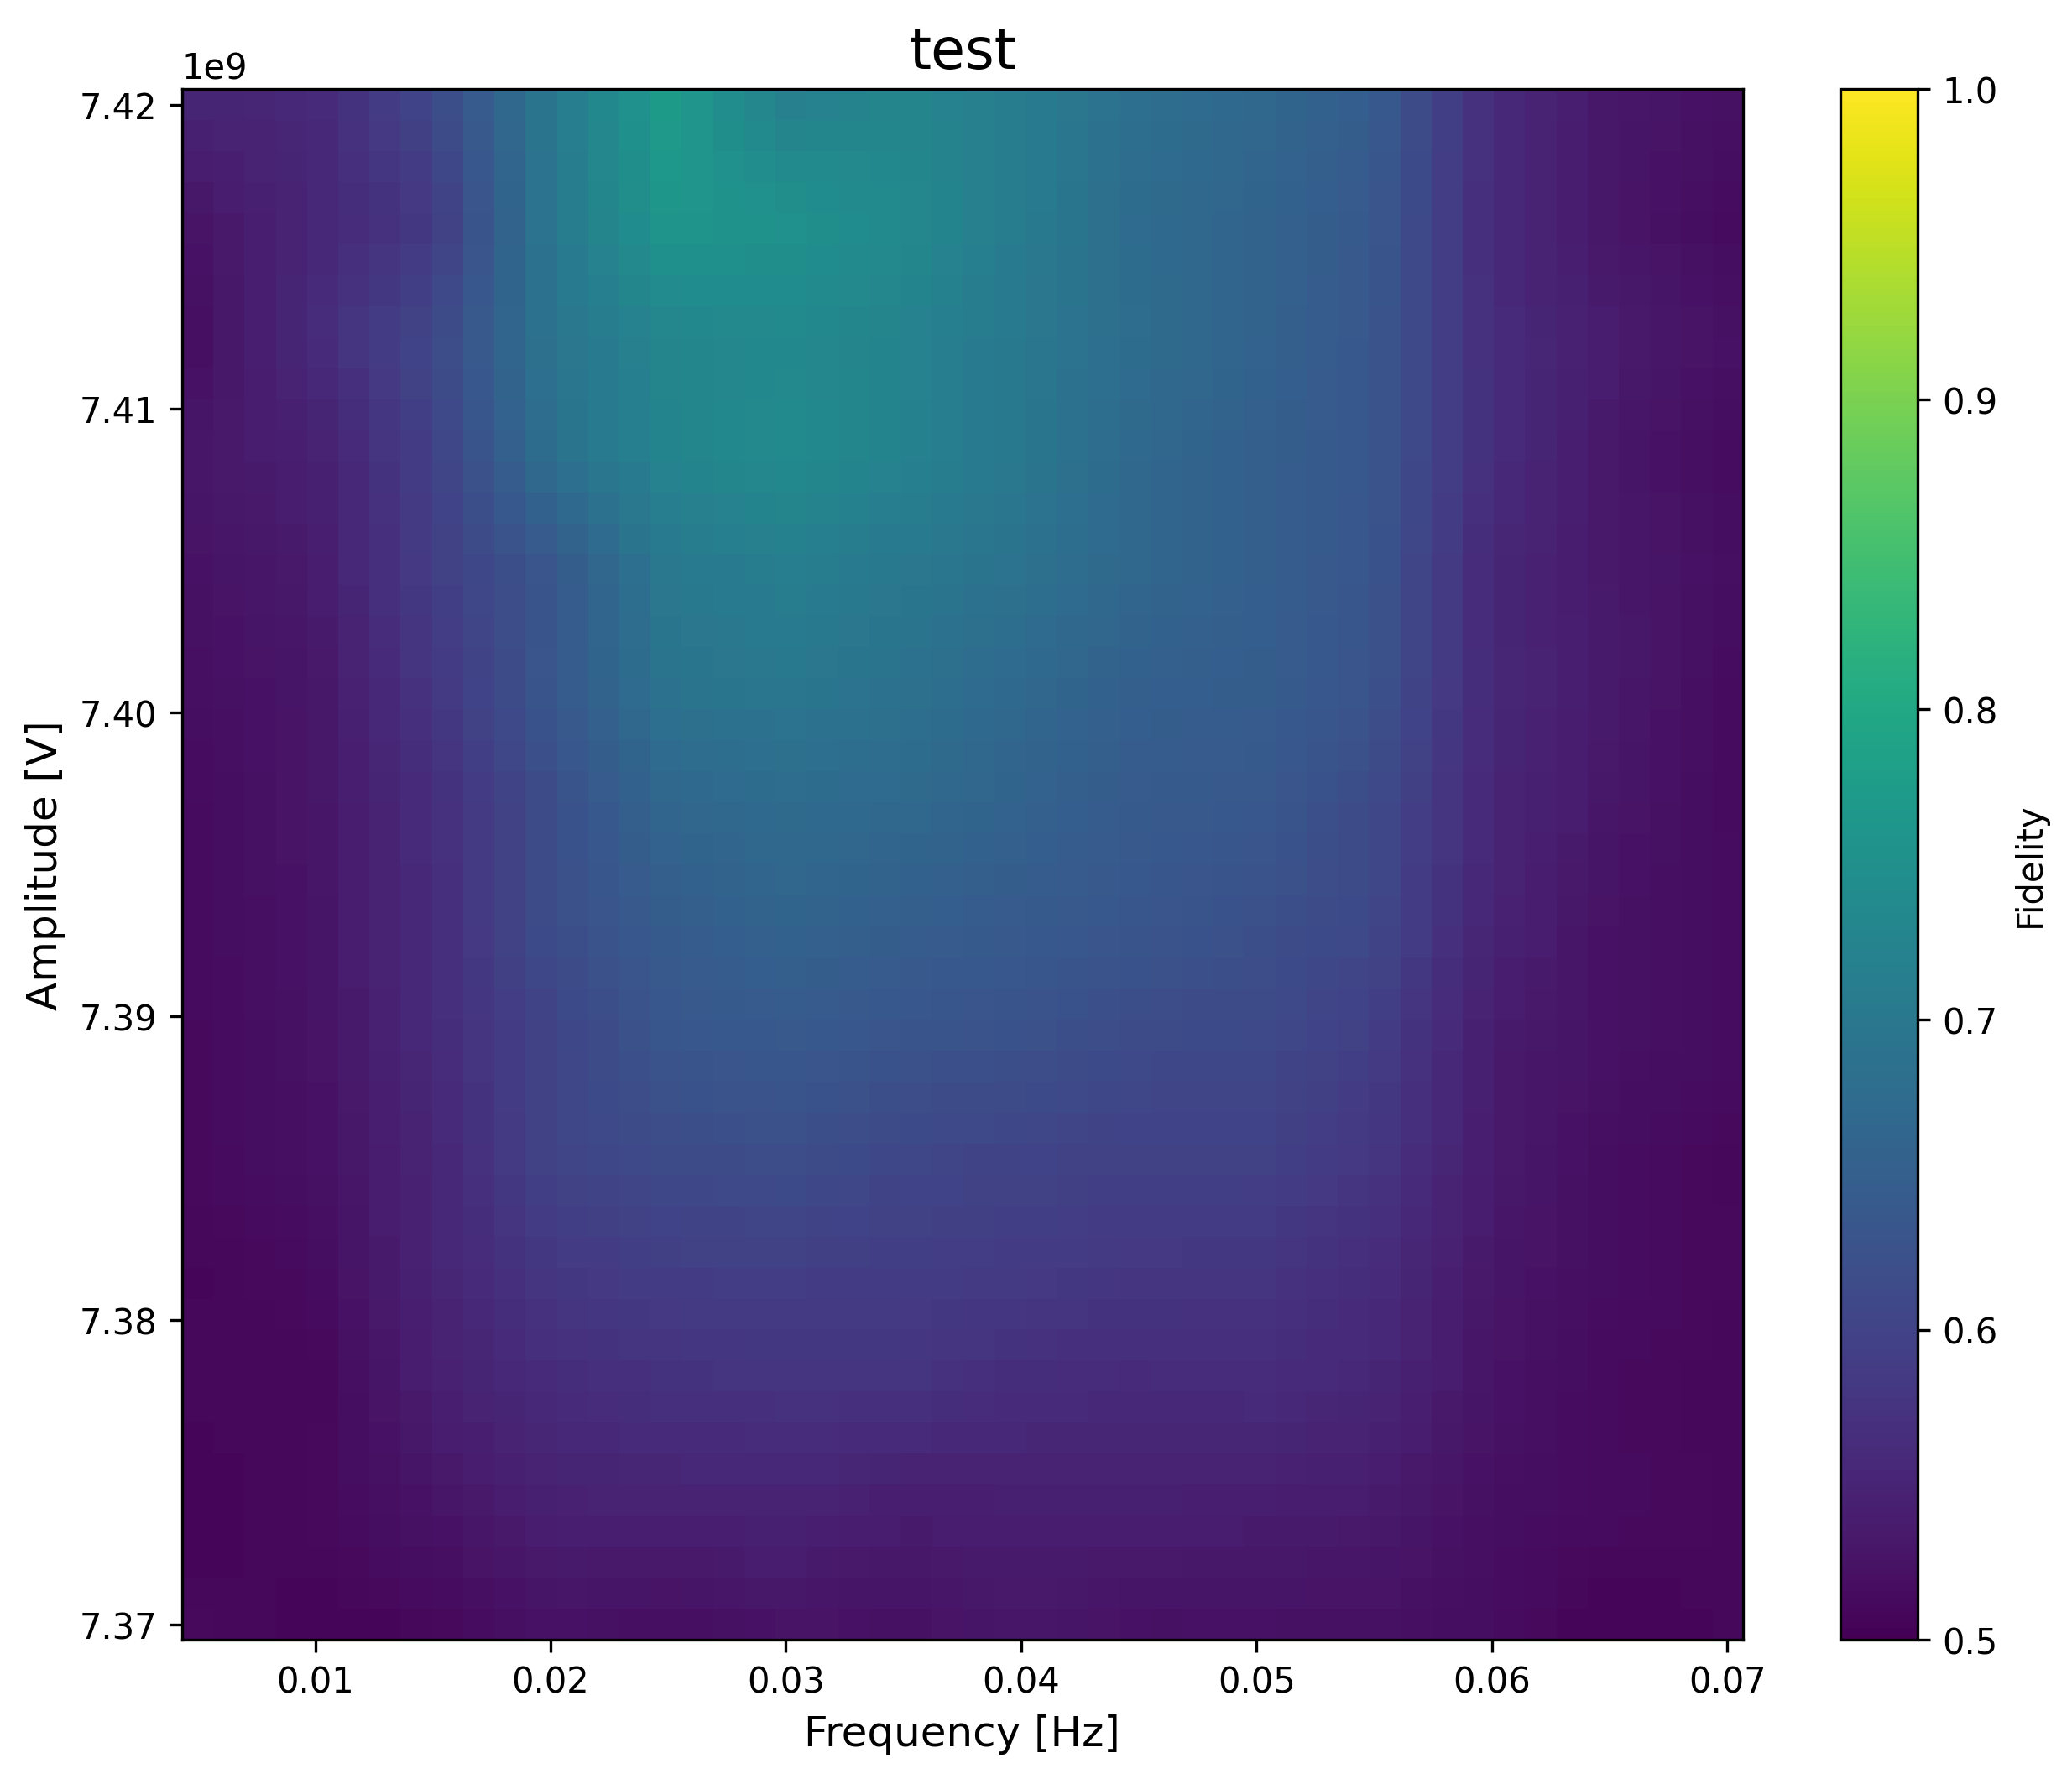

In [20]:
# # Select a fixed duration for the plot (e.g., the first duration value)
# duration_index = 0  # You can change this index to visualize different durations
# fidelity_slice = fidelity_matrix[:, :, duration_index]

# Z = fidelity_slice.reshape(len(y_array),len(x_array))

# # Calculate the extent of the axes for imshow
# dx = (y.max() - y.min()) / (Z.shape[1] - 1)  # Step size along x-axis
# dy = (x.max() - x.min()) / (Z.shape[0] - 1)  # Step size along y-axis

# extent = [
#     y.min() - 0.5 * dx, y.max() + 0.5 * dx,  # x-axis range
#     x.min() - 0.5 * dy, x.max() + 0.5 * dy   # y-axis range
# ]

# # Plot with imshow
# plt.figure(figsize=(10, 8), dpi=300)
# cmap = 'viridis'
# vmin, vmax = 0.5, 1  # Set fidelity range for consistent scaling

# im = plt.imshow(Z, extent=extent, origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax)
# plt.colorbar(im, label="Fidelity")
# plt.title("test", fontsize=16)
# plt.xlabel("Frequency [Hz]", fontsize=12)
# plt.ylabel("Amplitude [V]", fontsize=12)
# plt.show()